In [22]:
from Functions.func import NPZDatasetManager,ClassDistributionPlotter,BalancedDatasetSampler, DatasetSplitter,ImageTransformer
from Functions.func import visualize_image_channels
from Functions.func import plot_confusion_matrices
from Functions.func import plot_multiclass_roc
from Functions.func import generate_dataset_info
from Functions.func import TrainingPlotter
#from Functions.func import plot_dataset_info
import tensorflow as tf


import numpy as np

In [3]:
manager = NPZDatasetManager("Data")

Number of .npz files in the path: 2
Data/jetImage_7_100p_40000_50000.npz
Data/Jet Image 10000-20000.npz


In [4]:
my_dataset = manager.load_npz_by_index(0)
(my_dataset['jetClass'])

Keys in the NPZ file: ['jetImage', 'jetClass']


array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [5]:
#load the x and y del dataset
var_x = my_dataset['jetImage']
var_y = my_dataset['jetClass']
plotter = ClassDistributionPlotter(var_y)

In [6]:
#First create a Dictionary for the data
#dict of particle
particles = {
    "gluons": [1, 0, 0, 0, 0],
    "quarks": [0, 1, 0, 0, 0],
    "Ws":     [0, 0, 1, 0, 0],
    "Zs":     [0, 0, 0, 1, 0],
    "tops":   [0, 0, 0, 0, 1]
}
particle_dict = {
    "gluons": 0,
    "quarks": 1,
    "Ws":     2,
    "Zs":     3,
    "tops":   4
}

class_names = ["Gluons", "Quarks", "Ws", "Zs", "Tops"]

/Users/bryphy/U/ML jet tag/JetTag/Functions/func.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Class', y='Count', data=data, palette=palette)


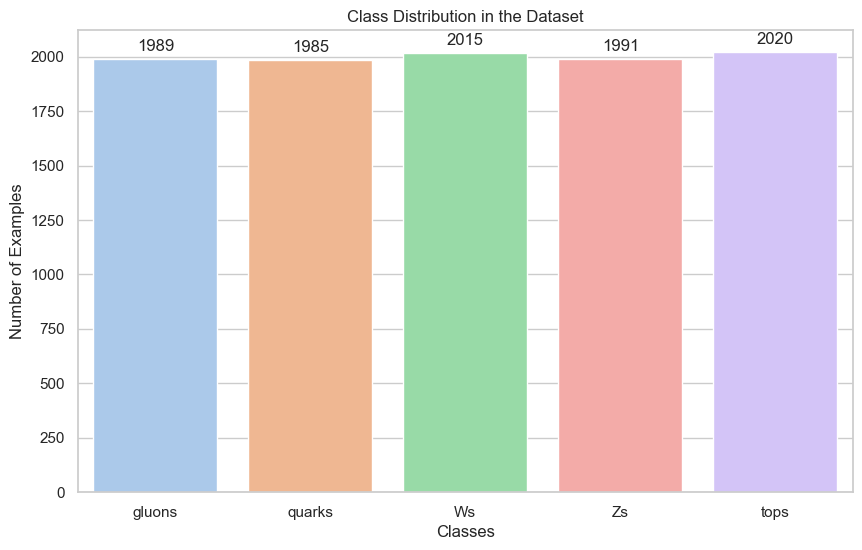

In [7]:


# Create an instance of the ClassDistributionPlotter
plotter = ClassDistributionPlotter(var_y)
# Map labels to class names
plotter.map_labels(particle_dict)
# Plot the distribution
plotter.plot_distribution()


/Users/bryphy/U/ML jet tag/JetTag/Functions/func.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Class', y='Count', data=data, palette=palette)


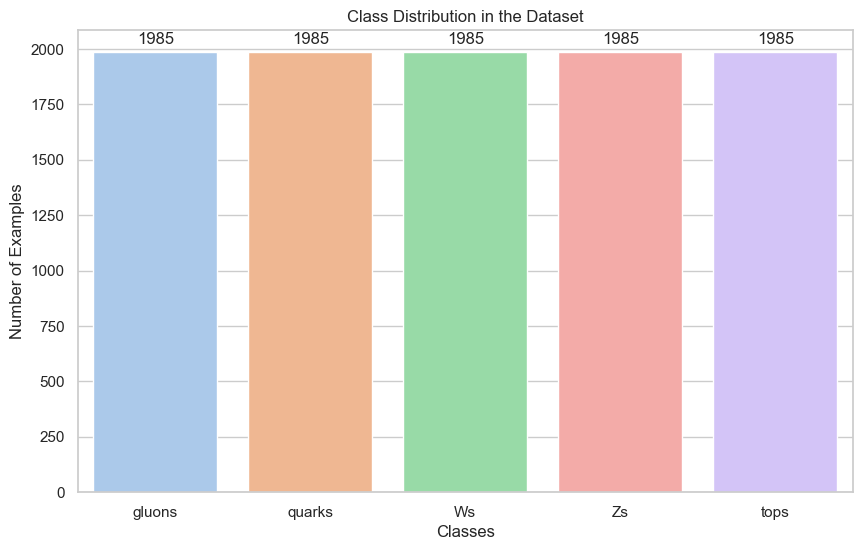

In [8]:
balanced_sampler = BalancedDatasetSampler(var_x, var_y)
balanced_sampler.balance_dataset(shuffle=False)
images = balanced_sampler.balanced_images
labels = balanced_sampler.balanced_labels

plotter = ClassDistributionPlotter(labels)
# Map labels to class names
plotter.map_labels(particle_dict)
# Plot the distribution
plotter.plot_distribution()

In [ ]:
info_result = generate_dataset_info(images, labels)
print(info_result)

In [9]:

# Check if expanding the dimensions of the images is necessary
if images.ndim == 3:
    # Add a third axis for the channel
    images = np.expand_dims(images, axis=-1)

In [10]:
info_result = generate_dataset_info(images, labels)
print(info_result)

Length of images: 9925
Shape of images: (9925, 100, 100, 1)
Shape of the first element of images: (100, 100, 1)
Length of labels: 9925
Shape of labels: (9925, 5)
Shape of the first element of labels: (5,)


In [11]:
splitter = DatasetSplitter(train_size=0.7, val_size=0.15, test_size=0.15)
splits = splitter.split_data(images, labels)

Dimensions of the training set:  (6947, 100, 100, 1)
Dimensions of the validation set:  (1489, 100, 100, 1)
Dimensions of the test set:  (1489, 100, 100, 1)


In [12]:
transformation_lay = []


In [13]:
transformer = ImageTransformer()

In [14]:
X_train_transformed, y_train_transformed = transformer.apply_transformset(splits['X_train'], splits['y_train'],
                                                              transformation_list= transformation_lay,
                                                              normalize_function=True,
                                                              apply_fft=False,
                                                              )


In [15]:
X_train_transformed_info = generate_dataset_info(X_train_transformed.numpy(),
                                                 y_train_transformed.numpy())
print(X_train_transformed_info)

Length of images: 6947
Shape of images: (6947, 100, 100, 1)
Shape of the first element of images: (100, 100, 1)
Length of labels: 6947
Shape of labels: (6947, 5)
Shape of the first element of labels: (5,)


In [16]:

X_val_transformed, y_val_transformed = transformer.apply_transformset(splits['X_val'], splits['y_val'],
                                                             transformation_list= transformation_lay,
                                                              normalize_function=True,
                                                              apply_fft=False)

In [17]:
X_val_transformed_info = generate_dataset_info(X_val_transformed.numpy(),
                                               y_val_transformed.numpy(),
                                               )
print(X_val_transformed_info)

Length of images: 1489
Shape of images: (1489, 100, 100, 1)
Shape of the first element of images: (100, 100, 1)
Length of labels: 1489
Shape of labels: (1489, 5)
Shape of the first element of labels: (5,)


In [18]:

X_test_transformed, y_test_transformed = transformer.apply_transformset(splits['X_test'], splits['y_test'],
                                                              #transformation_list= transformation_lay, --> is not't necesary for test data
                                                              normalize_function=True,
                                                              apply_fft=False)


In [19]:
X_test_transformed_info = generate_dataset_info(X_test_transformed.numpy(),
                                               y_test_transformed.numpy()
                                               )
print(X_test_transformed_info)

Length of images: 1489
Shape of images: (1489, 100, 100, 1)
Shape of the first element of images: (100, 100, 1)
Length of labels: 1489
Shape of labels: (1489, 5)
Shape of the first element of labels: (5,)


In [20]:

n_batch= 128
train_loader = tf.data.Dataset.from_tensor_slices((X_train_transformed, y_train_transformed)).shuffle(buffer_size=len(X_train_transformed)).batch(n_batch)
val_loader = tf.data.Dataset.from_tensor_slices((X_val_transformed, y_val_transformed)).batch(n_batch)
test_loader = tf.data.Dataset.from_tensor_slices((X_test_transformed, y_test_transformed)).batch(n_batch)

In [21]:

def print_batch_shapes(loader, data_type):
    for X, y in loader:
        print(f"#--- {data_type} batch's shapes---------------")
        print(f"Shape of X [N,  H, W ,C]: {X.shape}")
        print(f"Shape of y: {y.shape} {y.dtype}")
        break

print_batch_shapes(train_loader, "Training")
print_batch_shapes(val_loader, "Validation")
print_batch_shapes(test_loader, "Testing")

#--- Training batch's shapes---------------
Shape of X [N,  H, W ,C]: (128, 100, 100, 1)
Shape of y: (128, 5) <dtype: 'float32'>
#--- Validation batch's shapes---------------
Shape of X [N,  H, W ,C]: (128, 100, 100, 1)
Shape of y: (128, 5) <dtype: 'float32'>
#--- Testing batch's shapes---------------
Shape of X [N,  H, W ,C]: (128, 100, 100, 1)
Shape of y: (128, 5) <dtype: 'float32'>


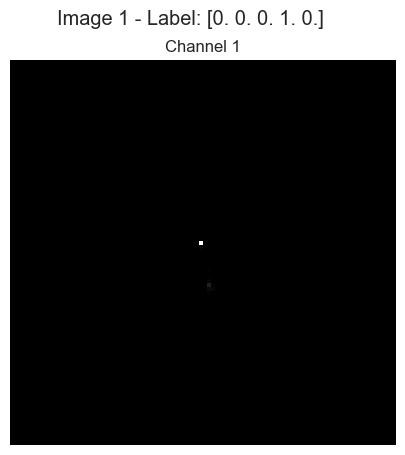

Min pixel value in channel 1: 0.0
Max pixel value in channel 1: 0.5429469347000122
Channel 1 is correctly normalized


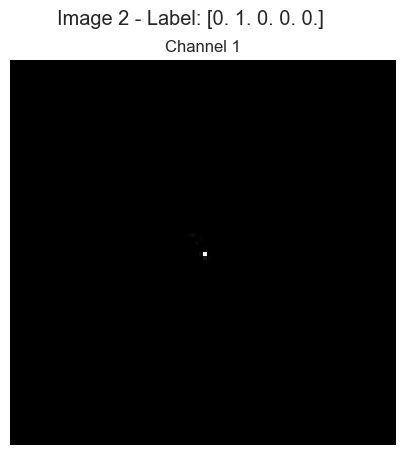

Min pixel value in channel 1: 0.0
Max pixel value in channel 1: 0.5366693735122681
Channel 1 is correctly normalized


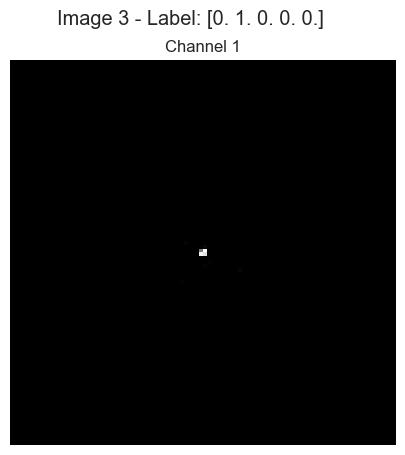

Min pixel value in channel 1: 0.0
Max pixel value in channel 1: 0.2032100260257721
Channel 1 is correctly normalized


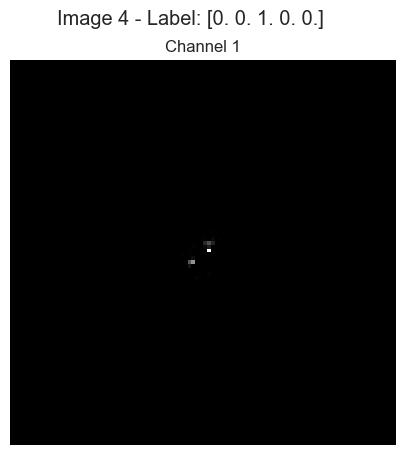

Min pixel value in channel 1: 0.0
Max pixel value in channel 1: 0.3099960684776306
Channel 1 is correctly normalized


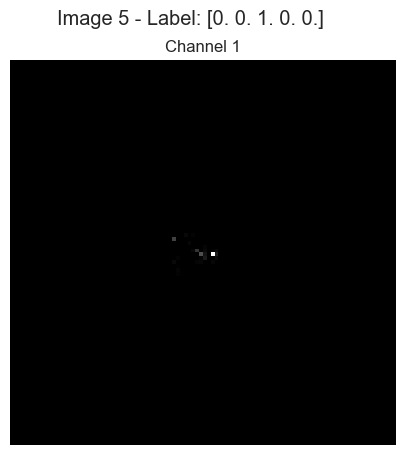

Min pixel value in channel 1: 0.0
Max pixel value in channel 1: 0.285427063703537
Channel 1 is correctly normalized


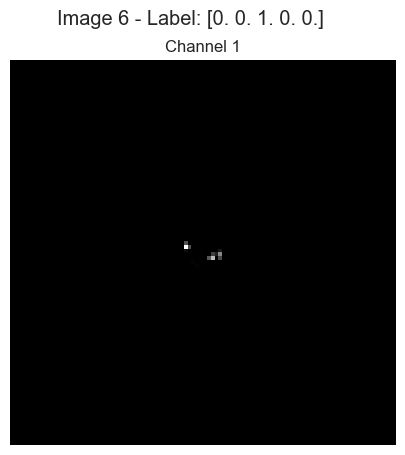

Min pixel value in channel 1: 0.0
Max pixel value in channel 1: 0.17297638952732086
Channel 1 is correctly normalized


2024-06-14 17:04:11.171748: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [23]:

# Assuming train_loader is a TensorFlow data loader with batches of images and labels
for images, labels in train_loader.take(1):
    visualize_image_channels(images, labels, num_images=6)


## Model 1

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

def create_simple_model(input_shape=(100, 100, 1), num_classes=5):
    model = Sequential()

    # Convolutional layers
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Fully connected layers
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Create the model
input_shape = (100, 100, 1)
num_classes = 5
model = create_simple_model(input_shape, num_classes)

# Display model summary
model.summary()

/Users/bryphy/U/ML jet tag/JetTag/.venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 98, 98, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 47, 47, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,333,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,354,053 (16.61 MB)

 Trainable params: 4,353,605 (16.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [25]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('Models/best_model.keras', monitor='val_loss', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

callbacks = [early_stopping, model_checkpoint, reduce_lr]

# Train the model
history = model.fit(train_loader,
                    epochs=50,
                    validation_data=val_loader,

                    callbacks=callbacks)

Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.3752 - loss: 2.1916 - val_accuracy: 0.1901 - val_loss: 2.0893 - learning_rate: 0.0010
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.4610 - loss: 1.5908 - val_accuracy: 0.1901 - val_loss: 1.9717 - learning_rate: 0.0010
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.4893 - loss: 1.4380 - val_accuracy: 0.2814 - val_loss: 1.9435 - learning_rate: 0.0010
Epoch 4/50
11/55 ━━━━━━━━━━━━━━━━━━━━ 1:04 1s/step - accuracy: 0.5098 - loss: 1.3725

KeyboardInterrupt: 

### Load the model that was trinend in Colab 

In [ ]:
import tensorflow as tf

# Cargar el modelo
modelo = tf.keras.models.load_model('Models/best_model3.keras')

# Mostrar un resumen del modelo
modelo.summary()

# Usar el modelo para predecir
# Suponiendo que tienes un conjunto de datos 'X' para predecir
predicciones = modelo.predict(X)
print(predicciones)

In [ ]:
plotter = TrainingPlotter(history)
plotter.plot_metrics()


## Model 2


In [ ]:


def create_model2(input_shape=(100, 100, 1), num_classes=5):
    model = Sequential()

    # Convolutional layers
    model.add(Conv2D(32, (3, 3),activation='relu', input_shape=input_shape, kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Fully connected layers
    model.add(Flatten())
    model.add(Dense(300, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(100, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Create the model
input_shape = (100, 100, 1)
num_classes = 5
model2 = create_model2(input_shape, num_classes)

# Display model summary
model2.summary()

In [ ]:

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('Models/best_model2.keras', monitor='val_loss', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.01, patience=3, min_lr=0.01)

callbacks = [early_stopping, model_checkpoint, reduce_lr]

# Train the model
history2 = model2.fit(train_loader,
                    epochs=50,
                    validation_data=val_loader,
                    callbacks=callbacks)

In [ ]:
plotter = TrainingPlotter(history2)
plotter.plot_metrics()

## Model 3

In [ ]:
def model3(input_shape=(100, 100, 1), num_classes=5):
    model = Sequential()


    # Convolutional layers
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))

    model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))

    # Fully connected layers
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.0005),  # Reducir la tasa de aprendizaje
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model
# Create the model
input_shape = (100, 100, 1)
num_classes = 5
model3 =model3(input_shape, num_classes)

# Display model summary
model3.summary()


In [ ]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('Models/best_model3_lr0_0001.keras', monitor='val_loss', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

callbacks = [early_stopping, model_checkpoint, reduce_lr]

In [ ]:
history3 = model3.fit(train_loader,
                    epochs=50,
                    validation_data=val_loader,
                    callbacks=callbacks)

In [ ]:
plotter = TrainingPlotter(history3)
plotter.plot_metrics()

In [27]:
import tensorflow as tf

# Cargar el modelo
modelo3 = tf.keras.models.load_model('Models/best_model3.keras')

# Mostrar un resumen del modelo
#odelo3.summary()



TypeError: <class 'keras.src.models.sequential.Sequential'> could not be deserialized properly. Please ensure that components that are Python object instances (layers, models, etc.) returned by `get_config()` are explicitly deserialized in the model's `from_config()` method.

config={'module': 'keras', 'class_name': 'Sequential', 'config': {'name': 'sequential_3', 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_input_shape': [None, 100, 100, 1], 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'conv2d_8_input'}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2d_8', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': [None, 100, 100, 1], 'filters': 32, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': {'module': 'keras.regularizers', 'class_name': 'L2', 'config': {'l2': 0.009999999776482582}, 'registered_name': None}, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 100, 100, 1]}}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'batch_normalization_13', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.99, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 98, 98, 32]}}, {'module': 'keras.layers', 'class_name': 'MaxPooling2D', 'config': {'name': 'max_pooling2d_8', 'trainable': True, 'dtype': 'float32', 'pool_size': [2, 2], 'padding': 'valid', 'strides': [2, 2], 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, 98, 98, 32]}}, {'module': 'keras.layers', 'class_name': 'Dropout', 'config': {'name': 'dropout_13', 'trainable': True, 'dtype': 'float32', 'rate': 0.4, 'noise_shape': None, 'seed': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 49, 49, 32]}}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2d_9', 'trainable': True, 'dtype': 'float32', 'filters': 64, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': {'module': 'keras.regularizers', 'class_name': 'L2', 'config': {'l2': 0.009999999776482582}, 'registered_name': None}, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 49, 49, 32]}}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'batch_normalization_14', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.99, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 47, 47, 64]}}, {'module': 'keras.layers', 'class_name': 'MaxPooling2D', 'config': {'name': 'max_pooling2d_9', 'trainable': True, 'dtype': 'float32', 'pool_size': [2, 2], 'padding': 'valid', 'strides': [2, 2], 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, 47, 47, 64]}}, {'module': 'keras.layers', 'class_name': 'Dropout', 'config': {'name': 'dropout_14', 'trainable': True, 'dtype': 'float32', 'rate': 0.4, 'noise_shape': None, 'seed': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 23, 23, 64]}}, {'module': 'keras.layers', 'class_name': 'Flatten', 'config': {'name': 'flatten_3', 'trainable': True, 'dtype': 'float32', 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, 23, 23, 64]}}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense_8', 'trainable': True, 'dtype': 'float32', 'units': 128, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': {'module': 'keras.regularizers', 'class_name': 'L2', 'config': {'l2': 0.009999999776482582}, 'registered_name': None}, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 33856]}}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'batch_normalization_15', 'trainable': True, 'dtype': 'float32', 'axis': [1], 'momentum': 0.99, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 128]}}, {'module': 'keras.layers', 'class_name': 'Dropout', 'config': {'name': 'dropout_15', 'trainable': True, 'dtype': 'float32', 'rate': 0.5, 'noise_shape': None, 'seed': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 128]}}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense_9', 'trainable': True, 'dtype': 'float32', 'units': 5, 'activation': 'softmax', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 128]}}]}, 'registered_name': None, 'build_config': {'input_shape': [None, 100, 100, 1]}, 'compile_config': {'optimizer': {'module': 'keras.optimizers', 'class_name': 'Adam', 'config': {'name': 'Adam', 'weight_decay': None, 'clipnorm': None, 'global_clipnorm': None, 'clipvalue': None, 'use_ema': False, 'ema_momentum': 0.99, 'ema_overwrite_frequency': None, 'jit_compile': True, 'is_legacy_optimizer': False, 'learning_rate': 9.999999747378752e-06, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}, 'registered_name': None}, 'loss': 'categorical_crossentropy', 'metrics': ['accuracy'], 'loss_weights': None, 'weighted_metrics': None, 'run_eagerly': None, 'steps_per_execution': None, 'jit_compile': None}}.

Exception encountered: <class 'keras.src.layers.convolutional.conv2d.Conv2D'> could not be deserialized properly. Please ensure that components that are Python object instances (layers, models, etc.) returned by `get_config()` are explicitly deserialized in the model's `from_config()` method.

config={'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2d_8', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': [None, 100, 100, 1], 'filters': 32, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': {'module': 'keras.regularizers', 'class_name': 'L2', 'config': {'l2': 0.009999999776482582}, 'registered_name': None}, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 100, 100, 1]}}.

Exception encountered: Error when deserializing class 'Conv2D' using config={'name': 'conv2d_8', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': [None, 100, 100, 1], 'filters': 32, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': {'module': 'keras.regularizers', 'class_name': 'L2', 'config': {'l2': 0.009999999776482582}, 'registered_name': None}, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}.

Exception encountered: Unrecognized keyword arguments passed to Conv2D: {'batch_input_shape': [None, 100, 100, 1]}

In [ ]:
def model3_1(input_shape=(100, 100, 1), num_classes=5):
    model = Sequential()


    # Convolutional layers
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))#, kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))


    model.add(Conv2D(64, (3, 3), activation='relu'))#, kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))


    # Fully connected layers
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))#, kernel_regularizer=l2(0.01)))



    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.0005),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model
# Create the model
input_shape = (100, 100, 1)
num_classes = 5
model3_1 =model3_1(input_shape, num_classes)

# Display model summary
model3_1.summary()


In [ ]:
history3_1 = model3_1.fit(train_loader,
                    epochs=50,
                    validation_data=val_loader)
                    #callbacks=callbacks)

In [ ]:
plotter = TrainingPlotter(history3_1)
plotter.plot_metrics()

## Model 4

In [ ]:


from tensorflow.keras.optimizers import Adagrad,SGD

def model4(input_shape=(100, 100, 1), num_classes=5):
    model = Sequential()



    # Convolutional layers
    model.add(Conv2D(32, (3, 3), activation='relu',input_shape=input_shape, kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))

    # Fully connected layers
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(100, activation='relu', kernel_regularizer=l2(0.02)))
    model.add(BatchNormalization())
    #model.add(Dropout(0.3))

    model.add(Dense(50, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    # Output layer
    model.add(Dense(num_classes, activation='softmax'))
    optimizer = SGD(learning_rate=0.00001)

    # Compile the model
    model.compile(optimizer=optimizer,  # Reducir la tasa de aprendizaje
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Crear el modelo con las capas de aumento de datos
input_shape = (100, 100, 1)
num_classes = 5
model4 = model4(input_shape, num_classes)

# Display model summary
model4.summary()


In [ ]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('Models/best_model4.keras', monitor='val_loss', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001)

callbacks = [early_stopping, model_checkpoint, reduce_lr]

In [ ]:
history4 = model4.fit(train_loader,
                    epochs=100,
                    validation_data=val_loader,
                    callbacks=callbacks)

In [ ]:
plotter = TrainingPlotter(history4)
plotter.plot_metrics()

##Model5

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Add, Flatten, Dropout, Dense, Input
from tensorflow.keras.models import Model

def residual_block(inputs, num_filters, kernel_size=(3, 3), strides=(1, 1), use_conv_shortcut=False):
    x = Conv2D(num_filters, kernel_size, strides=strides, padding='same', activation='relu')(inputs)
    x = Conv2D(num_filters, kernel_size, strides=strides, padding='same', activation='relu')(x)
    if use_conv_shortcut:
        identity = Conv2D(num_filters, (1, 1), strides=strides, padding='same')(inputs)
    else:
        identity = inputs
    x = Add()([x, identity])
    return x


def model5(input_shape=(100, 100, 1), dense1=256, dense2=128, num_classes=5):
    inputs = Input(shape=input_shape)

    x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = MaxPooling2D(2, 2)(x)

    x = residual_block(x, 128, use_conv_shortcut=True)
    x = MaxPooling2D(2, 2)(x)

    x = residual_block(x, 256, use_conv_shortcut=True)
    x = MaxPooling2D(2, 2)(x)

    x = Flatten()(x)
    x = Dropout(0.3)(x)
    x = Dense(dense1, activation='relu')(x)
    x = Dense(dense2, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    return model

# Crear una instancia del modelo funcional
input_shape = (100, 100, 1)
num_classes = 5
model5 = model5(input_shape=input_shape, dense1=256, dense2=128, num_classes=num_classes)

# Mostrar el resumen del modelo
model5.summary()



In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('Models/best_model5.keras', monitor='val_loss', save_best_only=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

callbacks = [early_stopping, model_checkpoint, reduce_lr]
model5.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
               loss='categorical_crossentropy',
               metrics=['accuracy'])


In [ ]:
history5 = model5.fit(train_loader,
                    epochs=100,
                    validation_data=val_loader,
                    callbacks=callbacks)

In [ ]:
plotter = TrainingPlotter(history5)
plotter.plot_metrics()

## Model 6

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense, Input, Add, Activation
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

def residual_block(x, filters, kernel_size=(3, 3), strides=(1, 1), activation='relu'):
    res = Conv2D(filters, kernel_size, padding='same', strides=strides, kernel_regularizer=l2(0.01))(x)
    res = BatchNormalization()(res)
    res = Activation(activation)(res)

    res = Conv2D(filters, kernel_size, padding='same', kernel_regularizer=l2(0.01))(res)
    res = BatchNormalization()(res)

    # Shortcut connection
    shortcut = Conv2D(filters, kernel_size=(1, 1), padding='same', strides=strides, kernel_regularizer=l2(0.01))(x)
    shortcut = BatchNormalization()(shortcut)

    out = Add()([res, shortcut])
    out = Activation(activation)(out)
    return out

def model6(input_shape=(100, 100, 1), num_classes=5):
    inputs = Input(shape=input_shape)

    x = Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_regularizer=l2(0.01))(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.4)(x)

    x = residual_block(x, 64)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.4)(x)

    x = Flatten()(x)
    x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.0005),  # Reducir la tasa de aprendizaje
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Create the model
input_shape = (100, 100, 1)
num_classes = 5
model6 = model6(input_shape, num_classes)

# Display model summary
model6.summary()

In [ ]:
history6 = model6.fit(train_loader,
                    epochs=100,
                    validation_data=val_loader,
                    callbacks=callbacks)

## Metrics 

In [ ]:
plot_multiclass_roc([model3],
                    class_names=class_names ,
                    data= (X_val_transformed, y_val_transformed),
                    each=True)

In [ ]:
plot_multiclass_roc([model,model2,model3,],
                    class_names=class_names ,
                    data= (X_val_transformed, y_val_transformed),
                    each=True)

In [ ]:
plot_multiclass_roc([model,model2,model3,model4,model5,model6],
                    class_names=class_names ,
                    data= (X_test_transformed, y_test_transformed),
                    each=True)

In [ ]:
plot_confusion_matrices([model3],
                        class_names=class_names,
                        data= (X_val_transformed, y_val_transformed) ,)
                        #each = True)

In [ ]:
plot_confusion_matrices([model3],
                        class_names=class_names,
                        data= (X_val_transformed, y_val_transformed),
                        each = True)